In [91]:
import uvc as uv
import uvcml 
import math
import numpy as np
#parametros de la lampara
radio=1.21
long_lamp=81.5
intensidad_sup=117

#parametros de la caja
xend=30
yend=30
zend=85

#Posición de la lampara
lampx1=0
lampy1=27
lampz1=0

lampx2=0
lampy2=27
lampz2=81


x2=lampx2-lampx1
y2=lampy2-lampy1
z2=lampz2-lampz1
p2=x2*x2+y2*y2+z2*z2




def tiemp(valores,coord):
	"""

   Analisis de los tiempos necesarios para matar al virus
 covid19 para el valor promedio mediante un modelo lineal, 
 para una esterilizacion del 90%.  t_teo

 	En segunda instancia se calcula el tiempo que llevaria 
 a la intensidad promedio del sistema el valor recomendado por
 el cdc 1 J/cm2 t_exp

"""


	target=99.99

	s=1-target/100
#constante específica del virus m2/J
#k = 0.37700/100  #factor correccion para llevarlo a cm2/microJ sarscov1
#k=0.0008528 #promedio autores 2020
	kv=0.0005522 #Inagaki 2020 
#La intensidad se encuentra en microW/cm2
#dimensionalmente el tiempo esta en segundos
	print('El promedio de intensidades: '+str(round(uv.promedio(valores))))
	t=math.log(s)/(-1*kv*uv.promedio(valores))

#el valor experimental 1 J/cm2
	exp=3*(10**6) #factor de corrección para llevarlo a microJ/cm2
#La intensidad se encuentra en microW/cm2

	t_e=exp/uv.promedio(valores)


#calculo de los tiempos teorico y experimental, para un plano especifico.
#considerando el plano de interes en Y=2

	Z1=[]

	for n in range(len(coord)):
		i,j,k = coord[n]
		if (j==1):
			if (k==round((lampz2-lampz1)/2)):
				Z1.append(valores[n])

#La menor intensidad a lo largo del eje perpendicular
#a lo largo del centro de la lampara se la considerara 
#como el valor a optimizar en tiempo
	Imin=min(Z1)

	tmin=math.log(s)/(-1*kv*Imin)
	t_emin=exp/Imin

	return tmin, t_emin


data=[]


for inc in range(31):
	aaa,coorde= uvcml.Matriz3d(xend,yend,zend,lampx1+inc,lampy1,lampz1,p2,x2,y2,z2,lampx2+inc,lampy2,lampz2)
	t1,t2=tiemp(aaa,coorde)
	data.append([inc,uv.promedio(aaa),t1,t2])
	print(inc)

dat=np.array(data)


El promedio de intensidades: 57388.0
0
El promedio de intensidades: 62093.0
1
El promedio de intensidades: 65658.0
2
El promedio de intensidades: 68487.0
3
El promedio de intensidades: 70814.0
4
El promedio de intensidades: 72764.0
5
El promedio de intensidades: 74412.0
6
El promedio de intensidades: 75809.0
7
El promedio de intensidades: 76987.0
8
El promedio de intensidades: 77971.0
9
El promedio de intensidades: 78780.0
10
El promedio de intensidades: 79427.0
11
El promedio de intensidades: 79921.0
12
El promedio de intensidades: 80269.0
13
El promedio de intensidades: 80476.0
14
El promedio de intensidades: 80545.0
15
El promedio de intensidades: 80476.0
16
El promedio de intensidades: 80269.0
17
El promedio de intensidades: 79921.0
18
El promedio de intensidades: 79427.0
19
El promedio de intensidades: 78780.0
20
El promedio de intensidades: 77971.0
21
El promedio de intensidades: 76987.0
22
El promedio de intensidades: 75809.0
23
El promedio de intensidades: 74412.0
24
El promedi

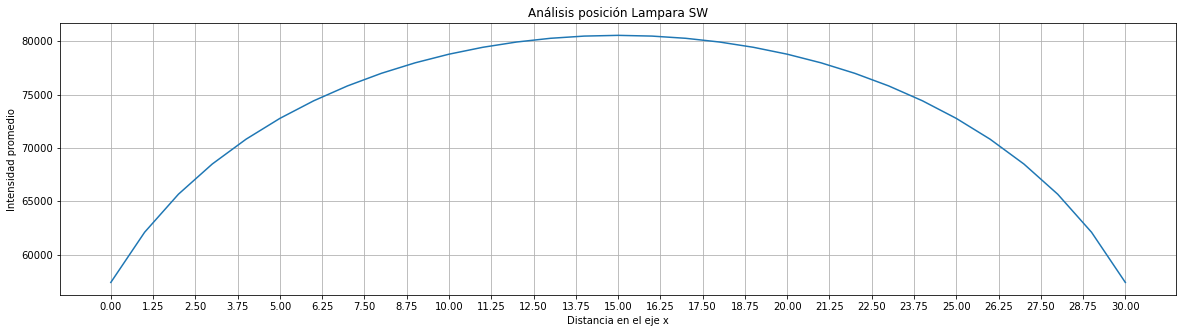

In [92]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np


plt.figure(figsize=(20,5)) # <-- dónde y cúando es necesario esto?

plt.plot(dat[:,0],dat[:,1])
plt.title('Análisis posición Lampara SW')
plt.xlabel('Distancia en el eje x')
plt.ylabel('Intensidad promedio')
plt.xticks(np.linspace(0, 30,25, endpoint=True))
plt.grid()
plt.show() 

In [96]:
mm=max(dat[:,1])


80545.07765543794

In [119]:
posx=lampx1+np.where(dat == mm)[0]
print('posición optima en x: '+str(int(posx))+' cm')
print('Intensidad: '+str(mm))
print('Tiempo teorico: '+str(round(float(dat[np.where(data == mm)[0],2]),3))+' seg')
print('Tiempo experimental '+str(round(float(dat[np.where(data == mm)[0],3]),3))+' seg')

posición optima en x: 15 cm
Intensidad: 80545.07765543794
Tiempo teorico: 0.571 seg
Tiempo experimental 102.736 seg
